<a href="https://colab.research.google.com/github/SamMilnes/Weather-Prediction-LSTM/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
global_temp = pd.read_csv('/content/gdrive/MyDrive/Data Science Group Project/GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [110]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [111]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


# Dropping Columns

In [5]:
global_temp_new = global_temp[["dt", "LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature", "LandAndOceanAverageTemperature"]]

# Dropping NA Values

# New Section

In [113]:
print(len(global_temp_new))

3192


In [114]:
global_temp_clean = global_temp_new.dropna()
print(len(global_temp_clean))

1992


# Plotting

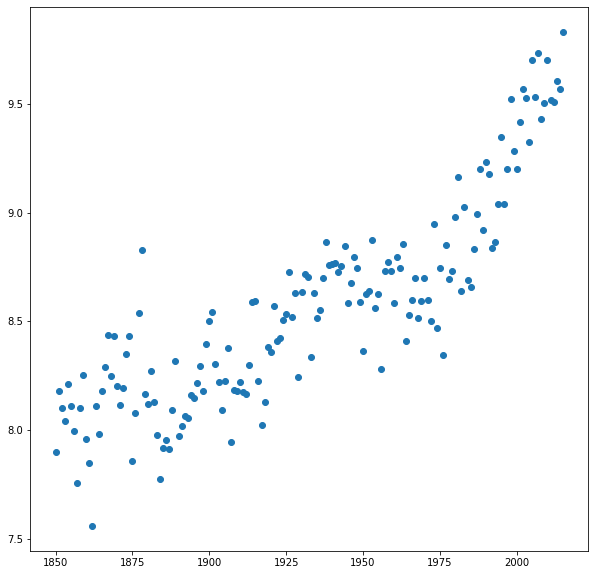

In [ ]:
global_temp_year_mean = global_temp_clean.copy()
global_temp_year_mean['Date'] = pd.to_datetime(global_temp_year_mean.dt, format='%Y-%m-%d')
global_temp_year_mean["Year"] = global_temp_year_mean["Date"].dt.year
global_temp_year_mean = global_temp_year_mean.groupby(['Year']).mean().reset_index()
plt.figure(figsize=(10,10))
plt.scatter(data = global_temp_year_mean, x = 'Year', y = 'LandAverageTemperature')
plt.show()

# Feature Engineering

---



In [ ]:
# df_final = global_temp_clean.copy()
# df_final['Date'] = pd.to_datetime(df_final.dt, format='%Y-%m-%d')
# df_final = df_final[["Date", "LandAverageTemperature"]]
# df_final['t-1'] = df_final['LandAverageTemperature'].shift(1)
# df_final['t-2'] = df_final['LandAverageTemperature'].shift(2)
# df_final['t-3'] = df_final['LandAverageTemperature'].shift(3)
# df_final.head()

,Date,LandAverageTemperature,t-1,t-2,t-3
1200,1850-01-01,0.749,NaN,NaN,NaN
1201,1850-02-01,3.071,0.749,NaN,NaN
1202,1850-03-01,4.954,3.071,0.749,NaN
1203,1850-04-01,7.217,4.954,3.071,0.749
1204,1850-05-01,10.004,7.217,4.954,3.071


In [ ]:
# lagged_feature_cols = ['t-3', 't-2', 't-1']
# df_lagged = df_final.loc[3:, lagged_feature_cols + ['LandAverageTemperature']]
# df_lagged_features = df_lagged.loc[:, lagged_feature_cols]
# # Create aggregated features
# df_lagged['max'] = df_lagged_features.aggregate(np.max, axis=1)
# df_lagged['min'] = df_lagged_features.aggregate(np.min, axis=1)
# df_lagged.head()

,t-3,t-2,t-1,LandAverageTemperature,max,min
1200,NaN,NaN,NaN,0.749,NaN,NaN
1201,NaN,NaN,0.749,3.071,0.749,0.749
1202,NaN,0.749,3.071,4.954,3.071,0.749
1203,0.749,3.071,4.954,7.217,4.954,0.749
1204,3.071,4.954,7.217,10.004,7.217,3.071


In [ ]:
# df_lagged.index = df_final.Date
# df_lagged_new = df_lagged.copy()
# df_lagged_new = df_lagged_new[3:]
# # Create month and quarter columns
# df_lagged_new['month'] = df_lagged_new.index.month 
# df_lagged_new['quarter'] = df_lagged_new.index.quarter
# df_lagged_new

,t-3,t-2,t-1,LandAverageTemperature,max,min,month,quarter
Date,,,,,,,,
1850-04-01,0.749,3.071,4.954,7.217,4.954,0.749,4,2
1850-05-01,3.071,4.954,7.217,10.004,7.217,3.071,5,2
1850-06-01,4.954,7.217,10.004,13.150,10.004,4.954,6,2
1850-07-01,7.217,10.004,13.150,14.492,13.150,7.217,7,3
1850-08-01,10.004,13.150,14.492,14.039,14.492,10.004,8,3
...,...,...,...,...,...,...,...,...
2015-08-01,12.312,14.505,15.051,14.755,15.051,12.312,8,3
2015-09-01,14.505,15.051,14.755,12.999,15.051,14.505,9,3
2015-10-01,15.051,14.755,12.999,10.801,15.051,12.999,10,4


# Creating LSTM Time Series Forecast with TensorFlow

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [7]:
test = global_temp_new.copy()
test = test[["dt", "LandAverageTemperature"]]
test = test.dropna()
test["Date"] = pd.to_datetime(test.dt, format='%Y-%m-%d')
test = test[["Date", "LandAverageTemperature"]]
temp = test["LandAverageTemperature"]
temp

0        3.034
1        3.083
2        5.626
3        8.490
4       11.573
         ...  
3187    14.755
3188    12.999
3189    10.801
3190     7.433
3191     5.518
Name: LandAverageTemperature, Length: 3180, dtype: float64

In [51]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [52]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((3175, 5, 1), (3175,))

In [53]:
X_train, y_train = X[:3000], y[:3000]
X_val, y_val = X[3000:3080], y[3000:3080]
X_test, y_test = X[3080:], y[3080:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3000, 5, 1), (3000,), (80, 5, 1), (80,), (95, 5, 1), (95,))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [55]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [56]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [57]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])

Epoch 1/15
89/94 [===========================>..] - ETA: 0s - loss: 82.3639 - root_mean_squared_error: 9.0755

94/94 [==============================] - 7s 54ms/step - loss: 81.3928 - root_mean_squared_error: 9.0218 - val_loss: 77.9720 - val_root_mean_squared_error: 8.8302
Epoch 2/15
91/94 [============================>.] - ETA: 0s - loss: 40.2583 - root_mean_squared_error: 6.3449

94/94 [==============================] - 4s 45ms/step - loss: 39.8277 - root_mean_squared_error: 6.3109 - val_loss: 29.2547 - val_root_mean_squared_error: 5.4088
Epoch 3/15
94/94 [==============================] - ETA: 0s - loss: 20.5212 - root_mean_squared_error: 4.5300

94/94 [==============================] - 5s 49ms/step - loss: 20.5212 - root_mean_squared_error: 4.5300 - val_loss: 18.8108 - val_root_mean_squared_error: 4.3371
Epoch 4/15
88/94 [===========================>..] - ETA: 0s - loss: 17.2554 - root_mean_squared_error: 4.1540

94/94 [==============================] - 4s 48ms/step - loss: 17.0052 - root_mean_squared_error: 4.1237 - val_loss: 14.6001 - val_root_mean_squared_error: 3.8210
Epoch 5/15
92/94 [============================>.] - ETA: 0s - loss: 11.5514 - root_mean_squared_error: 3.3987

94/94 [==============================] - 5s 50ms/step - loss: 11.4911 - root_mean_squared_error: 3.3899 - val_loss: 8.6085 - val_root_mean_squared_error: 2.9340
Epoch 6/15
86/94 [==========================>...] - ETA: 0s - loss: 4.8417 - root_mean_squared_error: 2.2004

94/94 [==============================] - 5s 48ms/step - loss: 4.5532 - root_mean_squared_error: 2.1338 - val_loss: 2.2180 - val_root_mean_squared_error: 1.4893
Epoch 7/15
82/94 [=========================>....] - ETA: 0s - loss: 1.1851 - root_mean_squared_error: 1.0886

94/94 [==============================] - 4s 44ms/step - loss: 1.2072 - root_mean_squared_error: 1.0987 - val_loss: 1.5462 - val_root_mean_squared_error: 1.2435
Epoch 8/15
90/94 [===========================>..] - ETA: 0s - loss: 0.9701 - root_mean_squared_error: 0.9849

94/94 [==============================] - 4s 48ms/step - loss: 0.9689 - root_mean_squared_error: 0.9843 - val_loss: 1.3599 - val_root_mean_squared_error: 1.1661
Epoch 9/15
91/94 [============================>.] - ETA: 0s - loss: 0.9342 - root_mean_squared_error: 0.9665

94/94 [==============================] - 4s 45ms/step - loss: 0.9277 - root_mean_squared_error: 0.9632 - val_loss: 0.7589 - val_root_mean_squared_error: 0.8711
Epoch 10/15
94/94 [==============================] - 0s 4ms/step - loss: 0.8948 - root_mean_squared_error: 0.9460 - val_loss: 0.9268 - val_root_mean_squared_error: 0.9627
Epoch 11/15
94/94 [==============================] - 0s 4ms/step - loss: 0.9003 - root_mean_squared_error: 0.9489 - val_loss: 0.9853 - val_root_mean_squared_error: 0.9926
Epoch 12/15
94/94 [==============================] - 0s 5ms/step - loss: 0.8865 - root_mean_squared_error: 0.9415 - val_loss: 0.8350 - val_root_mean_squared_error: 0.9138
Epoch 13/15
91/94 [============================>.] - ETA: 0s - loss: 0.8864 - root_mean_squared_error: 0.9415

94/94 [==============================] - 4s 48ms/step - loss: 0.8867 - root_mean_squared_error: 0.9416 - val_loss: 0.6489 - val_root_mean_squared_error: 0.8055
Epoch 14/15
94/94 [==============================] - 0s 4ms/step - loss: 0.8857 - root_mean_squared_error: 0.9411 - val_loss: 0.7887 - val_root_mean_squared_error: 0.8881
Epoch 15/15
94/94 [==============================] - 0s 5ms/step - loss: 0.8812 - root_mean_squared_error: 0.9387 - val_loss: 1.0079 - val_root_mean_squared_error: 1.0039


In [58]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [59]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

94/94 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,13.683416,12.937
1,14.123222,15.868
2,14.297552,14.750
3,12.617977,11.413
4,9.305130,6.367
...,...,...
2995,2.379456,3.336
2996,3.095016,3.720
2997,5.286038,6.208
2998,9.113853,9.245


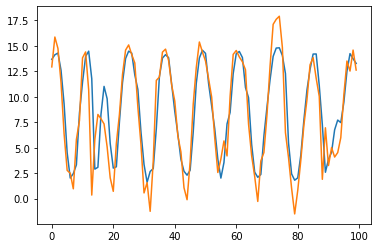

In [61]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [62]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals':y_val})
val_results

3/3 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,13.951801,14.110
1,14.328592,15.161
2,13.835794,14.427
3,12.123577,12.736
4,10.295671,9.935
...,...,...
75,12.241928,12.930
76,10.518925,10.332
77,7.542825,7.084
78,4.504364,4.523


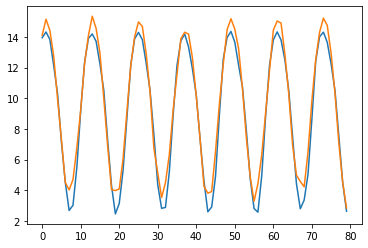

In [63]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [64]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals':y_test})
test_results

3/3 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
0,2.523509,3.576
1,4.575306,6.906
2,9.294296,9.295
3,12.479202,12.054
4,13.930929,14.145
...,...,...
90,13.631092,14.755
91,12.311342,12.999
92,10.579006,10.801
93,7.988948,7.433


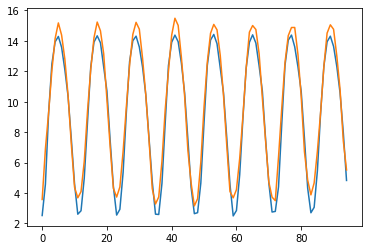

In [65]:
plt.plot(test_results['Test Predictions'][:120])
plt.plot(test_results['Actuals'][:120])